In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
! pip install xgboost

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.shape

(32560, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [11]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
df.loc[df.Native_country=='?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [13]:
df.loc[df.Occupation=='?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [15]:
df.drop(df[df['Native_country']=='?'].index,inplace=True)
df.drop(df[df['Occupation']=='?'].index,inplace=True)

In [16]:
df['Native_country'].unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

<AxesSubplot:>

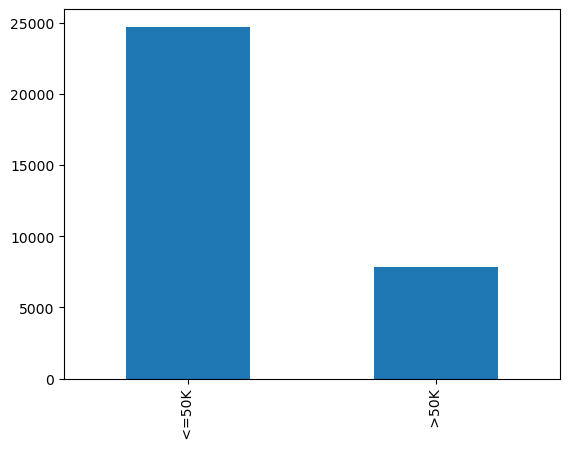

In [18]:
df['Income'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

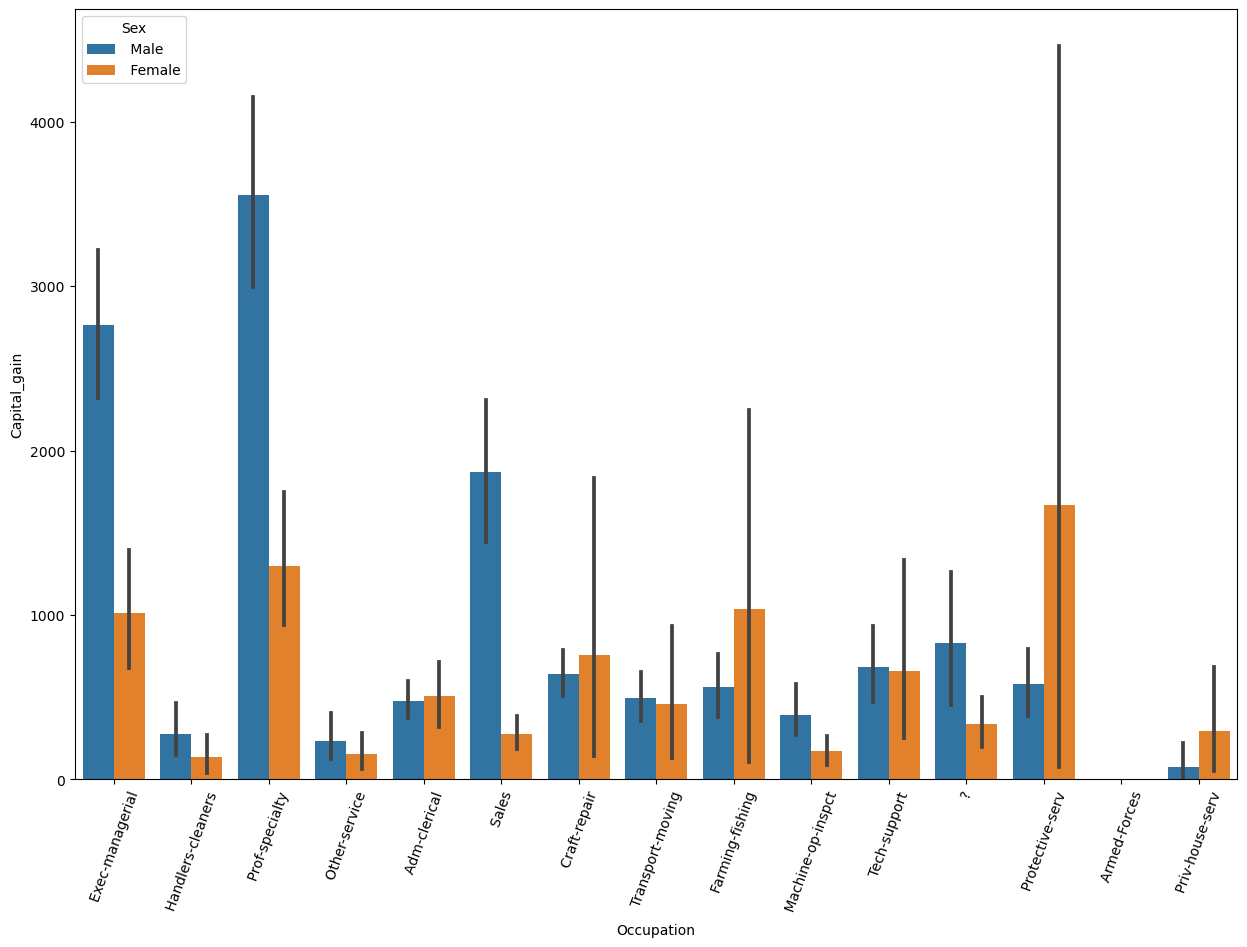

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=df,hue='Sex')
plt.xticks(rotation=70)

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

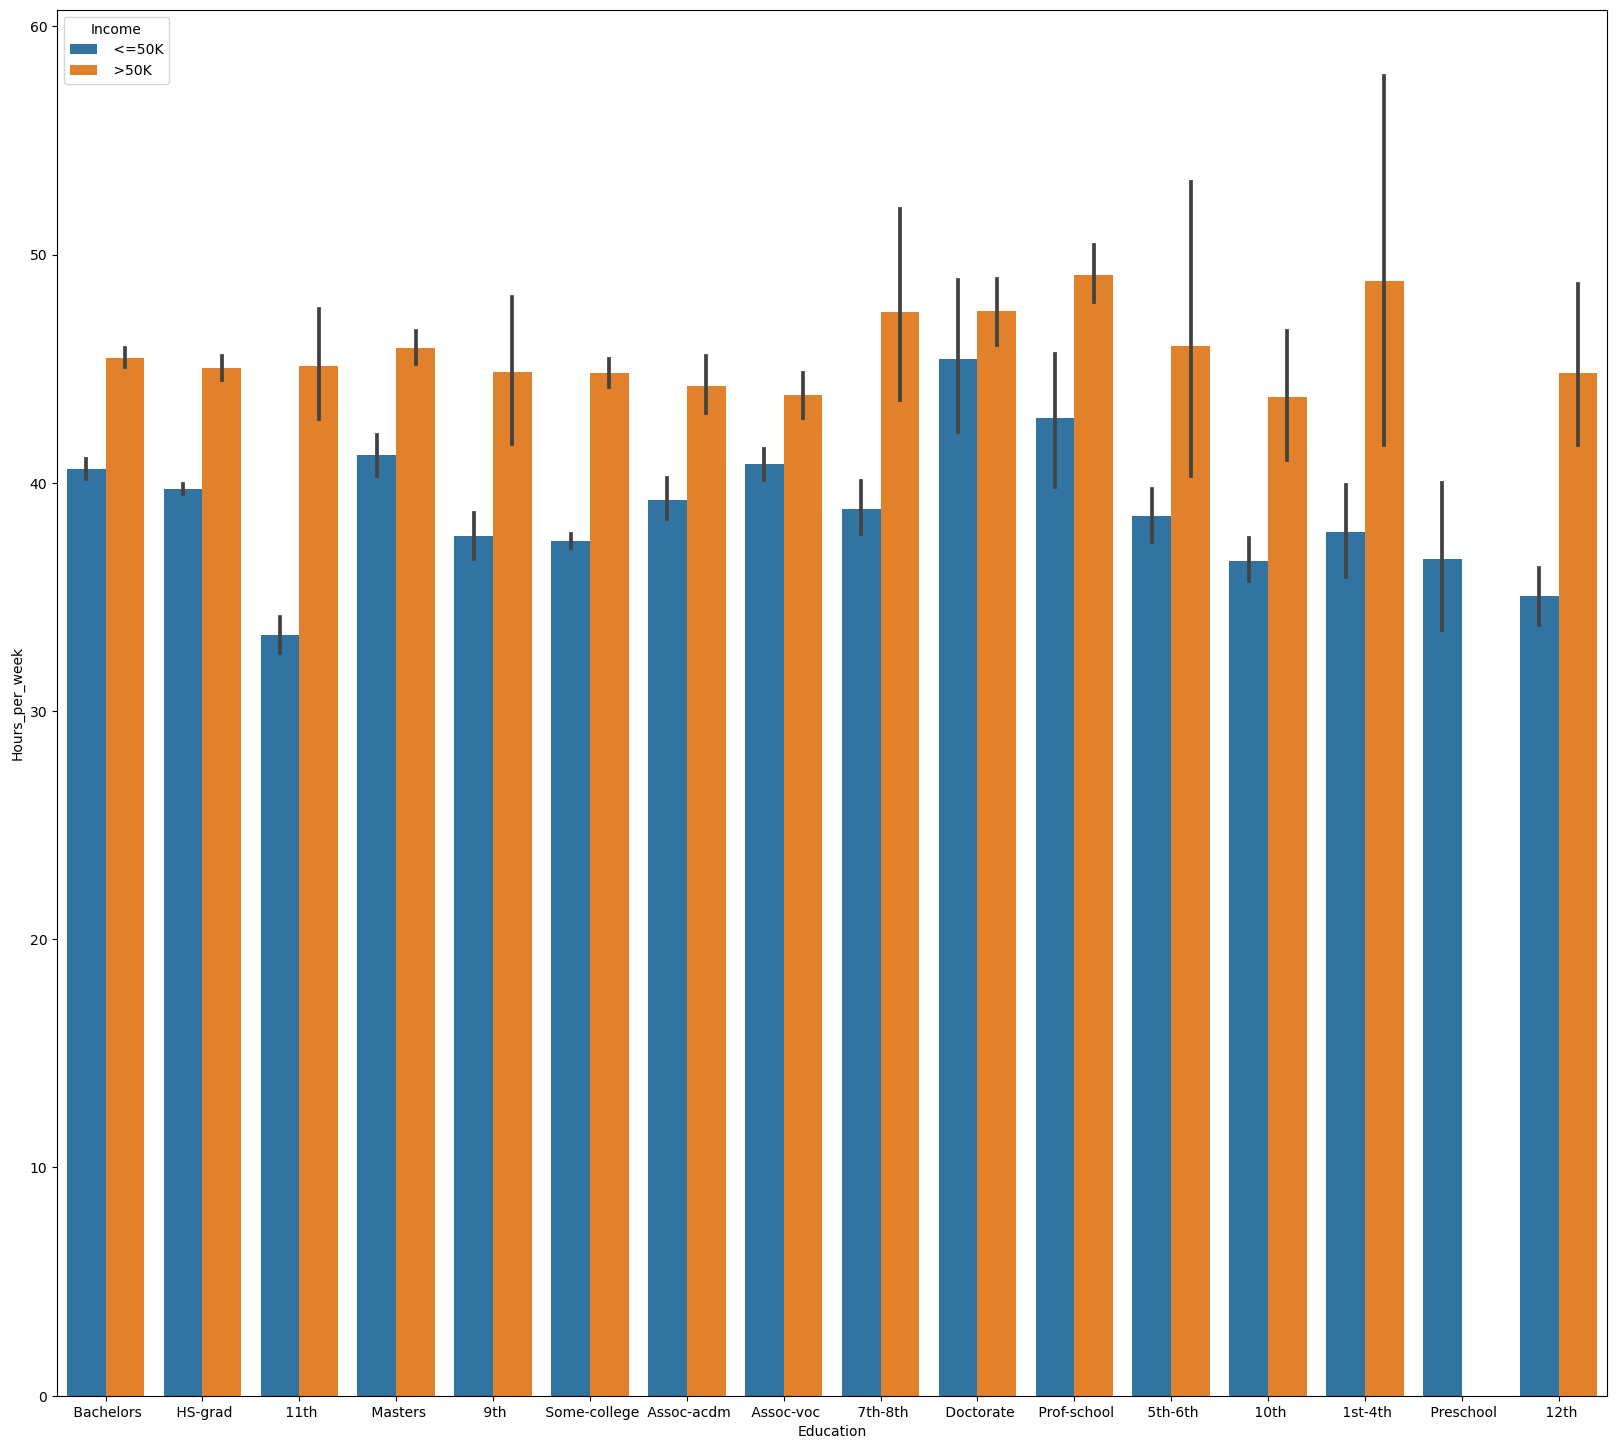

In [20]:
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=df,hue='Income')

In [24]:
#Data preprocessing & feature Engineering:
le=LabelEncoder()
df['Income']=le.fit_transform(df['Income'])
df['Sex']=le.fit_transform(df['Sex'])

df=pd.get_dummies(df,drop_first=True)
pd.set_option('display.max_columns',100)

In [25]:
df.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
scaler=StandardScaler()
train_col_sacle=df[['Age','Fnlwgt','Education_num','Hours_per_week']]
train_scaler_col=scaler.fit_transform(train_col_scale)

train_scaler_col=pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)

df['Age']=train_scaler_col['Age']
df['Fnlwgt']=train_scaler_col['Fnlwgt']
df['Education_num']=train_scaler_col['Education_num']
df['Hours_per_week']=train_scaler_col['Hours_per_week']


In [29]:
#Modeling Building And Saving
x=df.drop(['Income'],axis=1)
y=df['Income']


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=11)


In [43]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
svm=SVC()
gbdboost=GradientBoostingClassifier()
xgboost=XGBClassifier()
print("Model is created")

Model is created


In [47]:
lr.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
adb.fit(x_train,y_train)
svm.fit(x_train,y_train)
gbdboost.fit(x_train,y_train)
xgboost.fit(x_train,y_train)
print("Model is trained")

Model is trained


In [50]:
print("Lr classification score",lr.score(x_train,y_train))
print("knn classification score",knn.score(x_train,y_train))
print("dt classification score",dt.score(x_train,y_train))
print("rf classification score",rf.score(x_train,y_train))
print("adb classification score",adb.score(x_train,y_train))
print("svm classification score",svm.score(x_train,y_train))
print("gbdboost classification score",gbdboost.score(x_train,y_train))


Lr classification score 0.8441997191997191
knn classification score 0.897990522990523
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8585907335907336
svm classification score 0.8015531765531766
gbdboost classification score 0.8683748683748683


In [51]:
#Model Evaluation:

In [52]:
lr_yprad=lr.predict(x_test)
knn_yprad=knn.predict(x_test)
dt_yprad=dt.predict(x_test)
rf_yprad=rf.predict(x_test)
adb_yprad=adb.predict(x_test)
svm_yprad=svm.predict(x_test)
gbdboost_yprad=gbdboost.predict(x_test)
xgboost_yprad=xgboost.predict(x_test)


In [53]:
lr_conf_mat=confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",lr_conf_mat)

confusion matrix for lr_model [[6899  513]
 [ 954 1402]]


In [54]:
knn_conf_mat=confusion_matrix(y_test,lr_yprad)
print("confusion matrix for knn_model",knn_conf_mat)

confusion matrix for knn_model [[6899  513]
 [ 954 1402]]


In [55]:
dt_conf_mat=confusion_matrix(y_test,lr_yprad)
print("confusion matrix for dt_model",dt_conf_mat)

confusion matrix for dt_model [[6899  513]
 [ 954 1402]]


In [56]:
rf_conf_mat=confusion_matrix(y_test,lr_yprad)
print("confusion matrix for rf_model",rf_conf_mat)

confusion matrix for rf_model [[6899  513]
 [ 954 1402]]


In [57]:
adb_conf_mat=confusion_matrix(y_test,lr_yprad)
print("confusion matrix for adb_model",adb_conf_mat)

confusion matrix for adb_model [[6899  513]
 [ 954 1402]]


In [58]:
svm_conf_mat=confusion_matrix(y_test,lr_yprad)
print("confusion matrix for svm_model",svm_conf_mat)

confusion matrix for svm_model [[6899  513]
 [ 954 1402]]


In [59]:
gbdboost_conf_mat=confusion_matrix(y_test,lr_yprad)
print("confusion matrix for gbdboost_model",gbdboost_conf_mat)

confusion matrix for gbdboost_model [[6899  513]
 [ 954 1402]]


In [60]:
xgboost_conf_mat=confusion_matrix(y_test,lr_yprad)
print("confusion matrix for xgboost_model",xgboost_conf_mat)

confusion matrix for xgboost_model [[6899  513]
 [ 954 1402]]


In [61]:
#Classification report for each model:

In [64]:
lr_report=classification_report(y_test,lr_yprad)
print("lr classification_report",'\n',lr_report)

knn_report=classification_report(y_test,knn_yprad)
print("knn classification_report",'\n',knn_report)

dt_report=classification_report(y_test,dt_yprad)
print("dt classification_report",'\n',dt_report)

rf_report=classification_report(y_test,rf_yprad)
print("rf classification_report",'\n',rf_report)

adb_report=classification_report(y_test,adb_yprad)
print("adb classification_report",'\n',adb_report)

gbdboost_report=classification_report(y_test,gbdboost_yprad)
print("gbdboost classification_report",'\n',gbdboost_report)

svm_report=classification_report(y_test,svm_yprad)
print("svm classification_report",'\n',svm_report)

xgboost_report=classification_report(y_test,xgboost_yprad)
print("xgboost classification_report",'\n',xgboost_report)


lr classification_report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7412
           1       0.73      0.60      0.66      2356

    accuracy                           0.85      9768
   macro avg       0.81      0.76      0.78      9768
weighted avg       0.84      0.85      0.84      9768

knn classification_report 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      7412
           1       0.71      0.68      0.70      2356

    accuracy                           0.86      9768
   macro avg       0.81      0.80      0.80      9768
weighted avg       0.86      0.86      0.86      9768

dt classification_report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      7412
           1       0.61      0.64      0.62      2356

    accuracy                           0.81      9768
   macro avg       0.74      0.75      0.75   

In [ ]:
#ROC AUC Curve:

In [67]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import plot_roc_curve

#checking the roc_auc_score

print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dt.predict(x_test)))
print(roc_auc_score(y_test,rf.predict(x_test)))
print(roc_auc_score(y_test,adb.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))
print(roc_auc_score(y_test,gbdboost.predict(x_test)))
print(roc_auc_score(y_test,xgboost.predict(x_test)))

0.7629321560869952
0.7982574488027949
0.7528342741591895
0.781165219160046
0.7840265224016117
0.6273114446632222
0.7841259344503522
0.8107273617691497


In [ ]:
#lets find roc curve to check best fitted model


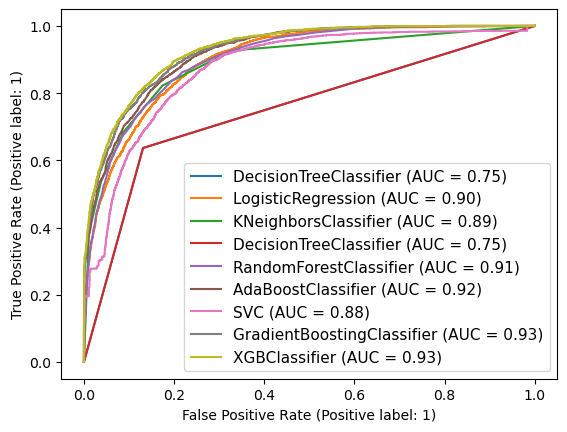

In [71]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdboost,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')




In [72]:
from sklearn.model_selection import KFold,cross_val_score

k_f=KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [73]:
print("Mean of Cross validation score for gbdboost model","=>",
      cross_val_score(gbdboost,x,y,cv=5).mean())

print("Mean of Cross validation score for xgboost model","=>",
      cross_val_score(xgboost,x,y,cv=5).mean())




Mean of Cross validation score for gbdboost model => 0.865909090909091
Mean of Cross validation score for xgboost model => 0.871468058968059


In [ ]:
from sklearn.model_selection import GridSearchCV

xgboost.get_params().keys()
parm_grid={'max_depth':[3,4],
         'subsample':[0.5,0.8],
         'learning_rate':[0.1],
         'min_child_weight':[1,2],
         'random_state':[4,5]}
parm_grid
{'max_depth':[3,4],
         'subsample':[0.5,0.8],
         'learning_rate':[0.1],
         'min_child_weight':[1,2],
         'random_state':[4,5]}

gridsearch=GridSearchCV(xgboost, param_grid=parm_grid,cv=5)

#fit the model using given parameters
gridsearch.fit(x_train,y_train)




In [ ]:
gridsearch.best_params_

In [ ]:
#import model
Census_model='Census_model.pickel'

pickle.dump(xgboost_tuning,open(Census_model,'wb'))